In [1]:
from os import path as osp
import os
from shutil import copy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from functools import lru_cache

In [75]:
plt.rcParams['figure.figsize']=[16, 8]

In [2]:
from heating_planner import colorscale 
from heating_planner.utils import sha

In [3]:
from PIL import Image

In [61]:
im = Image.open("/Users/f.weber/tmp-fweber/heating/geo_infoterre_brgm/near_seaLevel_anno.png")

In [62]:
img = np.asanyarray(im)

In [63]:
img.shape

(1510, 1388, 4)

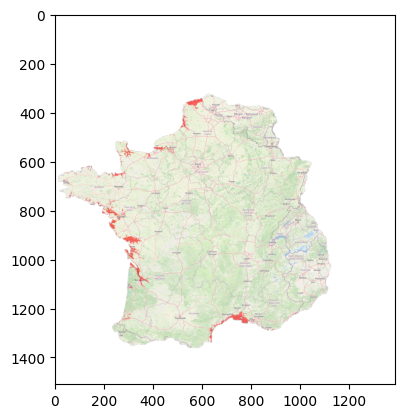

In [64]:
plt.imshow(img)

In [65]:
mask = img[:, :, -1]

In [66]:
img2 = (mask * img[:, :, 1])[330:, :1200]

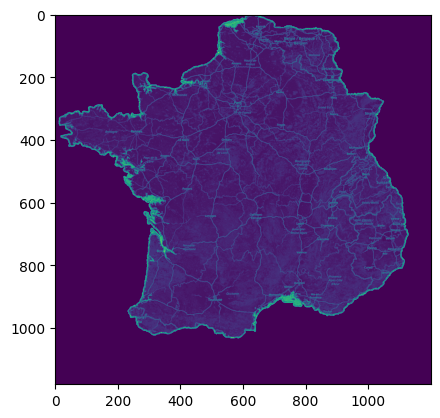

In [67]:
plt.imshow(img2)

In [68]:
img2.shape

(1180, 1200)

In [69]:
mask_fr = np.load("/Users/f.weber/tmp-fweber/heating/france_mask.npy")

In [110]:
img3 = np.where(mask_fr, np.nan, img2 > 110)

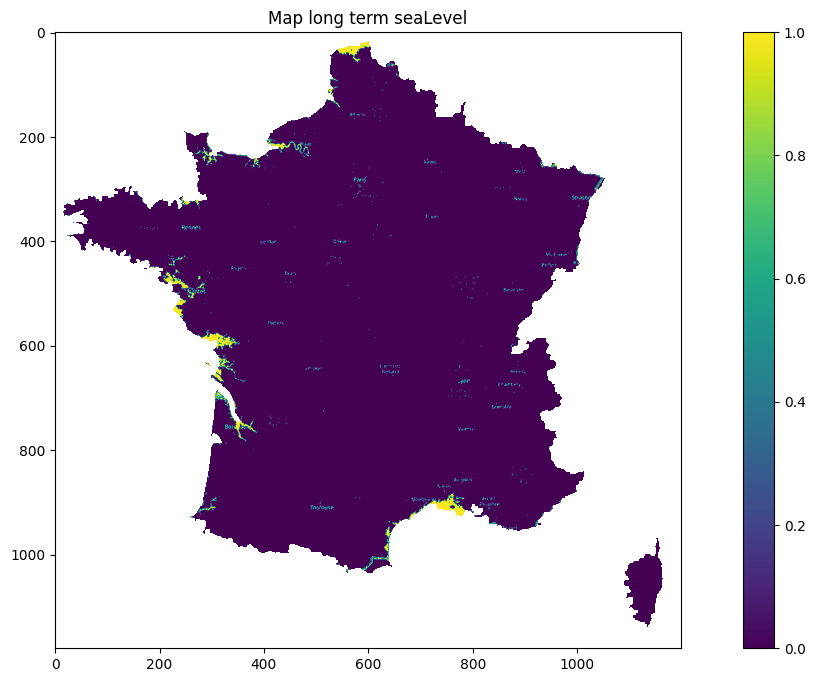

In [113]:
plt.imshow(img3)
plt.colorbar()
plt.title("Map long term seaLevel")
plt.savefig("/Users/f.weber/tmp-fweber/heating/maps/near_seaLevel_anno.png")

In [114]:
np.save("/Users/f.weber/tmp-fweber/heating/arrays/near_seaLevel_anno.npy", img3)

In [104]:
df = pd.read_json("/Users/f.weber/tmp-fweber/heating/metadata.json")

In [122]:
s = pd.DataFrame(
    index=["/Users/f.weber/tmp-fweber/heating/geo_infoterre_brgm/near_seaLevel_anno.png"], 
    data=[{
        "term": "near",
        "variable": "seaLevelOccupation",
        "season": "anno",
        "value_range": [0, 1],
        "fpath_array": "/Users/f.weber/tmp-fweber/heating/arrays/near_seaLevel_anno.npy",
        "fpath_map": "/Users/f.weber/tmp-fweber/heating/maps/near_seaLevel_anno.png",
        "optimal_range": None,
        "optimal_direction": None
    }]
)

In [126]:
s.to_json("/Users/f.weber/tmp-fweber/heating/metadata_external.json")

In [128]:
df.to_json("/Users/f.weber/tmp-fweber/heating/metadata.json")

In [127]:
df

,term,variable,season,value_range,fpath_array,fpath_map,optimal_range,optimal_direction
/Users/f.weber/tmp-fweber/heating/heavyWind_times/ref_nDaysHeavyWind_anno.png,ref,nDaysHeavyWind,anno,"[8, 9, 10, 11, 12, 13, 14, 15]",/Users/f.weber/tmp-fweber/heating/arrays/ref_n...,/Users/f.weber/tmp-fweber/heating/maps/ref_nDa...,"[6.25, 6.25]",neutral
/Users/f.weber/tmp-fweber/heating/heavyWind_times/medium_nDaysHeavyWind_anno.png,medium,nDaysHeavyWind,anno,"[8, 9, 10, 11, 12, 13, 14, 15]",/Users/f.weber/tmp-fweber/heating/arrays/mediu...,/Users/f.weber/tmp-fweber/heating/maps/medium_...,None,None
/Users/f.weber/tmp-fweber/heating/heavyWind_times/near_nDaysHeavyWind_anno.png,near,nDaysHeavyWind,anno,"[8, 9, 10, 11, 12, 13, 14, 15]",/Users/f.weber/tmp-fweber/heating/arrays/near_...,/Users/f.weber/tmp-fweber/heating/maps/near_nD...,None,None
/Users/f.weber/tmp-fweber/heating/heavyWind_speed/medium_heavyWindSpeed_summer.png,medium,heavyWindSpeed,summer,"[2, 4, 6, 8, 10, 12, 14]",/Users/f.weber/tmp-fweber/heating/arrays/mediu...,/Users/f.weber/tmp-fweber/heating/maps/medium_...,None,None
/Users/f.weber/tmp-fweber/heating/heavyWind_speed/ref_heavyWindSpeed_autumn.png,ref,heavyWindSpeed,autumn,"[2, 4, 6, 8, 10, 12, 14]",/Users/f.weber/tmp-fweber/heating/arrays/ref_h...,/Users/f.weber/tmp-fweber/heating/maps/ref_hea...,"[3.0, 8.18]",less is better
...,...,...,...,...,...,...,...,...
/Users/f.weber/tmp-fweber/heating/vague_chaleur/medium_nHeatWave_summer.png,medium,nHeatWave,summer,"[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2...",/Users/f.weber/tmp-fweber/heating/arrays/mediu...,/Users/f.weber/tmp-fweber/heating/maps/medium_...,None,None
/Users/f.weber/tmp-fweber/heating/vague_chaleur/near_nHeatWave_winter.png,near,nHeatWave,winter,"[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2...",/Users/f.weber/tmp-fweber/heating/arrays/near_...,/Users/f.weber/tmp-fweber/heating/maps/near_nH...,None,None
/Users/f.weber/tmp-fweber/heating/vague_chaleur/medium_nHeatWave_winter.png,medium,nHeatWave,winter,"[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2...",/Users/f.weber/tmp-fweber/heating/arrays/mediu...,/Users/f.weber/tmp-fweber/heating/maps/medium_...,None,None
/Users/f.weber/tmp-fweber/heating/vague_chaleur/near_nHeatWave_summer.png,near,nHeatWave,summer,"[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2...",/Users/f.weber/tmp-fweber/heating/arrays/near_...,/Users/f.weber/tmp-fweber/heating/maps/near_nH...,None,None
